In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.stats import linregress
from matplotlib.pyplot import figure
import json as json
from ohmysportsfeedspy import MySportsFeeds
from sports_api_key import api_key 
#api_key = 
output_data_file = "output_data/nba.csv"

msf = MySportsFeeds(version="2.0")
msf.authenticate(api_key, 'MYSPORTSFEEDS')


In [55]:
#output = msf.msf_get_data(league='nba',season='2018-2019-regular',feed='seasonal_games1',format='json')
#print(output)

team_stats = ['teamStatsTotals']
team_data = []
stats_data = []

lastUpdate = ['lastUpdatedOn']
#games = ['games']
#chedule = ['schedule']
for team in team_stats:
    response = msf.msf_get_data(league='nba',season='2019-2020-regular',feed='seasonal_team_stats',format='json')
    lastUpdate.append(response['lastUpdatedOn'])
    stats_data.append(response['teamStatsTotals'])
    #chedule.append(response['schedule'])
#print(response)


In [56]:
nbaStatsDict = stats_data
nbaStatsData = pd.DataFrame(stats_data)
nbaStatsData

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"{'team': {'id': 91, 'city': 'Atlanta', 'name':...","{'team': {'id': 82, 'city': 'Boston', 'name': ...","{'team': {'id': 84, 'city': 'Brooklyn', 'name'...","{'team': {'id': 93, 'city': 'Charlotte', 'name...","{'team': {'id': 89, 'city': 'Chicago', 'name':...","{'team': {'id': 86, 'city': 'Cleveland', 'name...","{'team': {'id': 108, 'city': 'Dallas', 'name':...","{'team': {'id': 99, 'city': 'Denver', 'name': ...","{'team': {'id': 88, 'city': 'Detroit', 'name':...","{'team': {'id': 101, 'city': 'Golden State', '...",...,"{'team': {'id': 96, 'city': 'Oklahoma City', '...","{'team': {'id': 95, 'city': 'Orlando', 'name':...","{'team': {'id': 85, 'city': 'Philadelphia', 'n...","{'team': {'id': 104, 'city': 'Phoenix', 'name'...","{'team': {'id': 97, 'city': 'Portland', 'name'...","{'team': {'id': 103, 'city': 'Sacramento', 'na...","{'team': {'id': 106, 'city': 'San Antonio', 'n...","{'team': {'id': 81, 'city': 'Toronto', 'name':...","{'team': {'id': 98, 'city': 'Utah', 'name': 'J...","{'team': {'id': 94, 'city': 'Washington', 'nam..."


In [57]:
nbaStats = nbaStatsData.transpose()


In [58]:
nbaStats.rename(columns = {0:'Data'}, inplace = True) 
nbaStatsConc = pd.concat([nbaStats.Data.apply(pd.Series)], axis=1)
nbaStatsConc.head()

,team,stats
0,"{'id': 91, 'city': 'Atlanta', 'name': 'Hawks',...","{'gamesPlayed': 67, 'fieldGoals': {'fg2PtAtt':..."
1,"{'id': 82, 'city': 'Boston', 'name': 'Celtics'...","{'gamesPlayed': 64, 'fieldGoals': {'fg2PtAtt':..."
2,"{'id': 84, 'city': 'Brooklyn', 'name': 'Nets',...","{'gamesPlayed': 64, 'fieldGoals': {'fg2PtAtt':..."
3,"{'id': 93, 'city': 'Charlotte', 'name': 'Horne...","{'gamesPlayed': 65, 'fieldGoals': {'fg2PtAtt':..."
4,"{'id': 89, 'city': 'Chicago', 'name': 'Bulls',...","{'gamesPlayed': 65, 'fieldGoals': {'fg2PtAtt':..."


In [59]:
statTeamData = pd.concat([nbaStatsConc.team.apply(pd.Series)], axis=1)
statTeamData.head(1)

,id,city,name,abbreviation,homeVenue,teamColoursHex,socialMediaAccounts,officialLogoImageSrc
0,91,Atlanta,Hawks,ATL,"{'id': 20, 'name': 'State Farm Arena'}","[#e03a3e, #c1d32f, #26282a]","[{'mediaType': 'TWITTER', 'value': 'ATLHawks'}]",https://global.nba.com/media/img/teams/00/logo...


In [60]:
nbaTeamStats = pd.concat([nbaStatsConc.stats.apply(pd.Series)], axis=1)
nbaTeamStats.head(1)

,gamesPlayed,fieldGoals,freeThrows,rebounds,offense,defense,miscellaneous,standings
0,67,"{'fg2PtAtt': 3653, 'fg2PtAttPerGame': 54.5, 'f...","{'ftAtt': 1566, 'ftAttPerGame': 23.4, 'ftMade'...","{'offReb': 662, 'offRebPerGame': 9.9, 'defReb'...","{'ast': 1605, 'astPerGame': 24.0, 'pts': 7488,...","{'tov': 1054, 'tovPerGame': 15.7, 'stl': 523, ...","{'fouls': 1597, 'foulsPerGame': 23.8, 'foulsDr...","{'wins': 20, 'losses': 47, 'winPct': 0.299, 'g..."


In [61]:
nbaStatsFG = pd.concat([nbaTeamStats.fieldGoals.apply(pd.Series)], axis=1)
nbaStatsFG.head(1)

,fg2PtAtt,fg2PtAttPerGame,fg2PtMade,fg2PtMadePerGame,fg2PtPct,fg3PtAtt,fg3PtAttPerGame,fg3PtMade,fg3PtMadePerGame,fg3PtPct,fgAtt,fgAttPerGame,fgMade,fgMadePerGame,fgPct
0,3653.0,54.5,1919.0,28.6,52.5,2416.0,36.1,805.0,12.0,33.3,6068.0,90.6,2723.0,40.6,44.9


In [62]:
nbaStatsOFF = pd.concat([nbaTeamStats.offense.apply(pd.Series)], axis=1)
nbaStatsOFF.head(1)

,ast,astPerGame,pts,ptsPerGame
0,1605.0,24.0,7488.0,111.8


In [63]:
nbaStatsDEF = pd.concat([nbaTeamStats.defense.apply(pd.Series)], axis=1)
nbaStatsDEF.head(1)

,tov,tovPerGame,stl,stlPerGame,blk,blkPerGame,blkAgainst,blkAgainstPerGame,ptsAgainst,ptsAgainstPerGame
0,1054.0,15.7,523.0,7.8,341.0,5.1,429.0,6.4,8027.0,119.8


In [64]:
nbaStatsMISC = pd.concat([nbaTeamStats.miscellaneous.apply(pd.Series)], axis=1)
nbaStatsMISC.head(1)

,fouls,foulsPerGame,foulsDrawn,foulsDrawnPerGame,foulPers,foulPersPerGame,foulPersDrawn,foulPersDrawnPerGame,foulTech,foulTechPerGame,...,foulFlag1PerGame,foulFlag1Drawn,foulFlag1DrawnPerGame,foulFlag2,foulFlag2PerGame,foulFlag2Drawn,foulFlag2DrawnPerGame,ejections,plusMinus,plusMinusPerGame
0,1597.0,23.8,1406.0,21.0,1548.0,23.1,1399.0,20.9,1548.0,0.4,...,0.0,4.0,0.1,0.0,0.0,1.0,0.0,1.0,-539.0,-8.0


In [65]:
nbaStatsSTAND = pd.concat([nbaTeamStats.standings.apply(pd.Series)], axis=1)
nbaStatsSTAND.head(1)

,wins,losses,winPct,gamesBack
0,20.0,47.0,0.299,0.0


In [66]:
teamAbr = statTeamData['abbreviation']
teamName = statTeamData['name']
pt2FGpct = nbaStatsFG['fg2PtPct']
pt3FGpct = nbaStatsFG['fg3PtPct']
totFGpct = nbaStatsFG['fgPct']
ptsScored = nbaStatsOFF['ptsPerGame']
tovPerGam = nbaStatsDEF['tovPerGame']
PtsAgainst = nbaStatsDEF['ptsAgainstPerGame']
teamWins = nbaStatsSTAND['wins']
teamLoss = nbaStatsSTAND['losses']
teamWinPct = nbaStatsSTAND['winPct']

pointDif = ptsScored - PtsAgainst



filtTeamStats = pd.DataFrame({"Abr":teamAbr,
                              "Team Name":teamName,
                              "Wins":teamWins,
                              "Losses":teamLoss,
                              "Win Pct":teamWinPct,
                              "FG % (2pt)":pt2FGpct,
                              "FG% (3pt)":pt3FGpct,
                              "Total FG%":totFGpct,
                              "Turnovers Committed":tovPerGam,
                              "Avg Points Scored":ptsScored,
                              "Avg Poinst Against":PtsAgainst,
                              "Avg Point Differentiation": pointDif
                              
})

In [67]:
filtTeamStats.to_csv('output_data/2019-20_TEAMSTATS.csv')
filtTeamStats


,Abr,Team Name,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Avg Points Scored,Avg Poinst Against,Avg Point Differentiation
0,ATL,Hawks,20.0,47.0,0.299,52.5,33.3,44.9,15.7,111.8,119.8,-8.0
1,BOS,Celtics,43.0,21.0,0.672,51.9,36.3,45.9,13.0,113.0,106.7,6.3
2,BRO,Nets,30.0,34.0,0.469,51.9,34.0,44.4,14.8,110.8,111.4,-0.6
3,CHA,Hornets,23.0,42.0,0.354,48.9,35.2,43.4,13.9,102.9,109.6,-6.7
4,CHI,Bulls,22.0,43.0,0.338,51.1,34.7,44.6,14.6,106.8,109.9,-3.1
5,CLE,Cavaliers,19.0,46.0,0.292,51.9,35.1,45.8,15.7,106.9,114.7,-7.8
6,DAL,Mavericks,40.0,27.0,0.597,54.3,36.9,46.2,12.2,116.4,110.4,6.0
7,DEN,Nuggets,43.0,22.0,0.662,52.9,35.8,47.1,12.9,110.4,107.4,3.0
8,DET,Pistons,20.0,46.0,0.303,51.5,36.7,45.9,14.6,107.2,110.8,-3.6
9,GSW,Warriors,15.0,50.0,0.231,49.6,33.4,43.8,14.3,106.3,115.0,-8.7


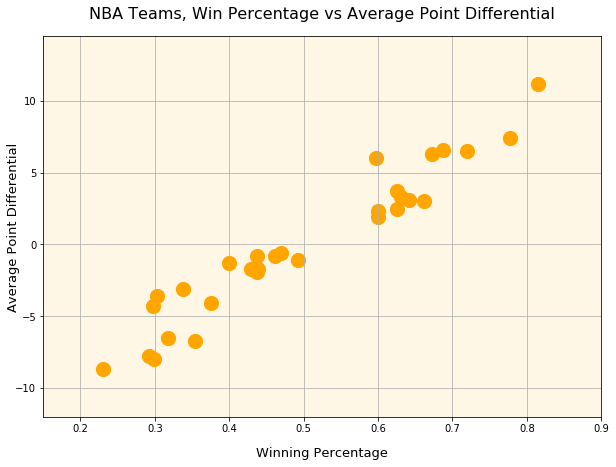

In [160]:
fig = plt.figure(figsize=(10,7))
plt.scatter(teamWinPct, pointDif, marker="o", s=200, facecolors="orange")
plt.ylim(-12.0,14.5)
plt.xlim(.15,.9)
plt.title("NBA Teams, Win Percentage vs Average Point Differential",fontsize=16, y=1.03)
plt.xlabel("Winning Percentage", fontsize=13, labelpad=13)
plt.ylabel("Average Point Differential", fontsize=13, labelpad=-5)
plt.grid()
ax = plt.gca()
ax.set_facecolor('#fff7e6')
plt.savefig("output_data/pointDif.png")
plt.show()

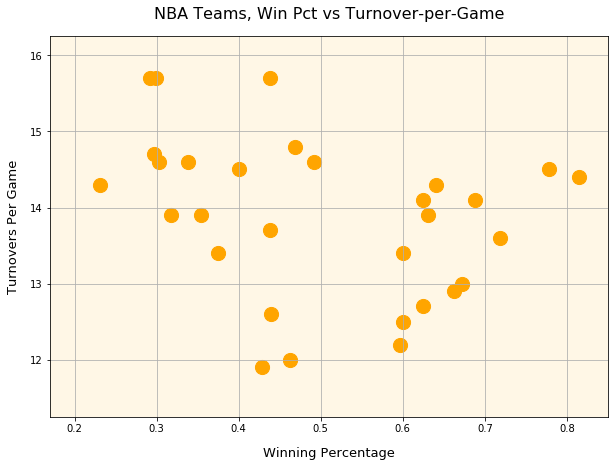

In [158]:
fig = plt.figure(figsize=(10,7))
plt.scatter( teamWinPct, tovPerGam, marker="o", s=200, facecolors="orange")
plt.ylim(11.25,16.25)
plt.xlim(.17,.85)
plt.title("NBA Teams, Win Pct vs Turnover-per-Game", fontsize=16, y=1.03)
plt.xlabel("Winning Percentage", fontsize=13, labelpad=13)
plt.ylabel("Turnovers Per Game", fontsize=13, labelpad=10)
plt.grid()
ax = plt.gca()
ax.set_facecolor('#fff7e6')
plt.savefig("output_data/toPerGame.png")
plt.show()

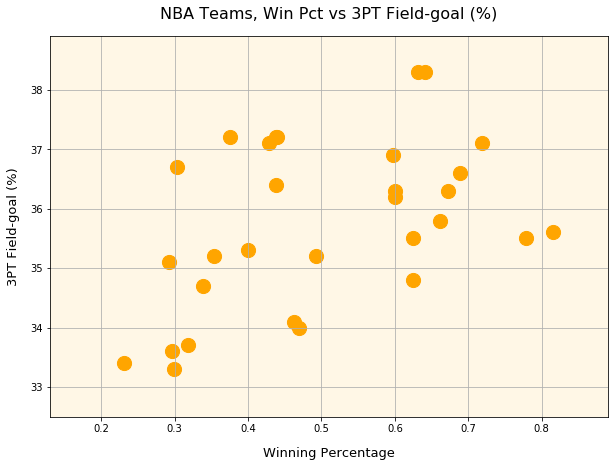

In [162]:
fig = plt.figure(figsize=(10,7))
plt.scatter(teamWinPct, pt3FGpct, marker="o", s=200, facecolors="orange")
plt.ylim(32.5,38.9)
plt.xlim(.13,.89)
plt.title("NBA Teams, Win Pct vs 3PT Field-goal (%)", fontsize=16, y=1.03)
plt.xlabel("Winning Percentage", fontsize=13, labelpad=13)
plt.ylabel("3PT Field-goal (%)", fontsize=13, labelpad=10)
plt.grid()
ax = plt.gca()
ax.set_facecolor('#fff7e6')
plt.savefig("output_data/3ptPer.png")
plt.show()

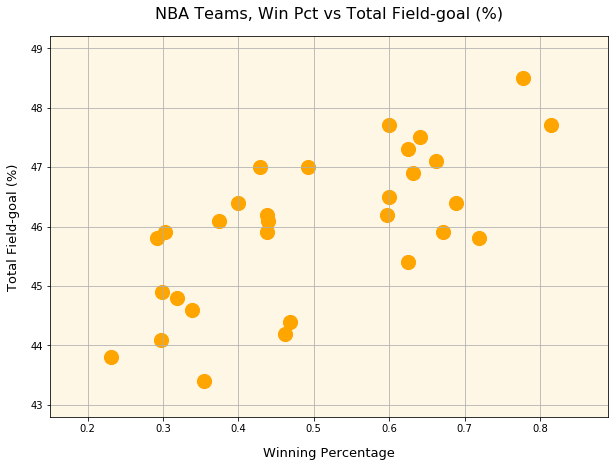

In [163]:
fig = plt.figure(figsize=(10,7))
plt.scatter(teamWinPct, totFGpct, marker="o", s=200, facecolors="orange")
plt.ylim(42.8,49.2)
plt.xlim(.15,.89)
plt.title("NBA Teams, Win Pct vs Total Field-goal (%)", fontsize=16, y=1.03)
plt.xlabel("Winning Percentage", fontsize=13, labelpad=13)
plt.ylabel("Total Field-goal (%)", fontsize=13, labelpad=10)
plt.grid()
ax = plt.gca()
ax.set_facecolor('#fff7e6')
plt.savefig("output_data/totFgPer.png")
plt.show()

In [153]:
print(filtTeamStats.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Abr</th>
      <th>Team Name</th>
      <th>Wins</th>
      <th>Losses</th>
      <th>Win Pct</th>
      <th>FG % (2pt)</th>
      <th>FG% (3pt)</th>
      <th>Total FG%</th>
      <th>Turnovers Committed</th>
      <th>Avg Points Scored</th>
      <th>Avg Poinst Against</th>
      <th>Avg Point Differentiation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ATL</td>
      <td>Hawks</td>
      <td>20.0</td>
      <td>47.0</td>
      <td>0.299</td>
      <td>52.5</td>
      <td>33.3</td>
      <td>44.9</td>
      <td>15.7</td>
      <td>111.8</td>
      <td>119.8</td>
      <td>-8.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>BOS</td>
      <td>Celtics</td>
      <td>43.0</td>
      <td>21.0</td>
      <td>0.672</td>
      <td>51.9</td>
      <td>36.3</td>
      <td>45.9</td>
      <td>13.0</td>
      <td>113.0</td>
      <td>106.7</td>
      <td>6.